In [39]:
import pandas as pd;
import numpy as np;
import tensorflow as tf;
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 텐서플로를 사용하면서 에러를 잡아주기 위한...
from tensorflow.python.keras.utils.np_utils import to_categorical
import pickle


# 데이터 로드

In [40]:
from tensorflow.keras.datasets.mnist import load_data;
(x_train, y_train),(x_test, y_test) = load_data(path='mnist.npz');

((60000, 28, 28), (60000,))

# 데이터 확인

In [ ]:
x_train.shape, y_train.shape

In [41]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [42]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [43]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 이미지 보기

In [44]:
# Show image
import matplotlib.pyplot as plt;
img = x_train[0, :];
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

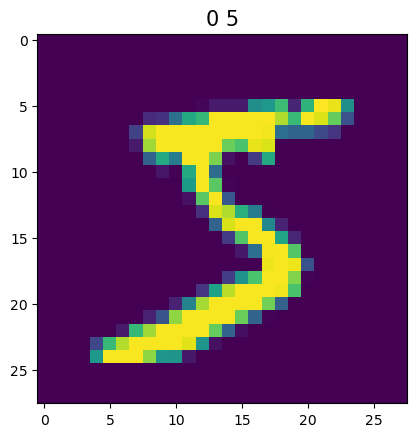

In [45]:
label = y_train[0];
plt.figure();
plt.imshow(img);
plt.title('%d %d' % (0, label), fontsize=15);
plt.show();

# 훈련 데이터 검증 데이터 분리

In [46]:
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import MinMaxScaler;

x_train, x_vali, y_train, y_vali = train_test_split(x_train, y_train,
                                                    test_size=0.3,
                                                    random_state=777
                                                    );
print(x_train.shape, y_train.shape)
print(x_vali.shape, y_vali.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


# x_train 차원 축소

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
print('x_train차원 축소 :', x_train.shape)
x_vali = x_vali.reshape(x_vali.shape[0], 28 * 28)
print('x_vali차원 축소 :', x_vali.shape)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)
print('x_test차원 축소 :', x_test.shape)


# x_train 정규화

In [ ]:
# 정규화!! (min max scaler는 3차원을 가능하지 않음.)
x_train_scaler = MinMaxScaler().fit_transform(x_train)
x_vali_scaler = MinMaxScaler().fit_transform(x_vali)
x_test_scaler = MinMaxScaler().fit_transform(x_test)

print('정규화된 형태',x_train_scaler[0, :])


# y_train 범주형 변환

In [ ]:
# 데이터가 시리얼 형태로 들어가 있음.
# 데이터를 범주형으로 변환
print(y_train.shape)
print('원본 데이터:',y_train[1])
y_train_cate = to_categorical(y_train) # 원핫인코딩과 유사한 개념
print(y_train.shape)
print('to_categorical 이후:',y_train[1])
y_vali_cate = to_categorical(y_vali)
y_test_cate = to_categorical(y_test)

# 모델 구성 - 신경망 구성

In [47]:
# 모델 구성 - 신경망 구성
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense;

model = Sequential();
# 784개 들어와서 10개가 나감.
model.add(Dense(64, activation='relu', input_shape=(784, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # 다중분류라서...softmax

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']);
model.fit(x_train_scaler, y_train_cate,
          epochs=30,
          validation_data=(x_vali_scaler, y_vali_cate),
          verbose=1);


x_train차원 축소 : (42000, 784)
x_vali차원 축소 : (18000, 784)
x_test차원 축소 : (10000, 784)
정규화된 형태 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.

# 모델 검증

In [ ]:
print(model.evaluate(x_test_scaler, y_test_cate))

# 모델 조정

In [48]:
model = Sequential();
# 784개 들어와서 10개가 나감.
model.add(Dense(128, activation='relu', input_shape=(784, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # 다중분류라서...softmax

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']);
model.fit(x_train_scaler, y_train_cate,
          epochs=30,
          validation_data=(x_vali_scaler, y_vali_cate),
          verbose=1);
model.evaluate(x_test_scaler, y_test_cate)

Epoch 1/30
1313/1313 [==============================] - 1s 1ms/step - loss: 0.3001 - acc: 0.9106 - val_loss: 0.1529 - val_acc: 0.9542
Epoch 2/30
1313/1313 [==============================] - 1s 981us/step - loss: 0.1229 - acc: 0.9633 - val_loss: 0.1293 - val_acc: 0.9617
Epoch 3/30
1313/1313 [==============================] - 1s 938us/step - loss: 0.0823 - acc: 0.9747 - val_loss: 0.1014 - val_acc: 0.9694
Epoch 4/30
1313/1313 [==============================] - 1s 954us/step - loss: 0.0645 - acc: 0.9797 - val_loss: 0.0961 - val_acc: 0.9729
Epoch 5/30
1313/1313 [==============================] - 1s 962us/step - loss: 0.0503 - acc: 0.9837 - val_loss: 0.0967 - val_acc: 0.9732
Epoch 6/30
1313/1313 [==============================] - 1s 992us/step - loss: 0.0404 - acc: 0.9875 - val_loss: 0.0991 - val_acc: 0.9743
Epoch 7/30
1313/1313 [==============================] - 1s 986us/step - loss: 0.0330 - acc: 0.9894 - val_loss: 0.1084 - val_acc: 0.9719
Epoch 8/30
1313/1313 [============================

[0.17626415193080902, 0.9732999801635742]

# 예측값 확인

In [49]:
result = model.predict(x_test_scaler);
print(result.shape)
print(result[0])

(10000, 10)
[1.9970412e-28 3.1830099e-19 1.0352343e-19 6.5786612e-22 1.9188450e-27
 1.8682403e-21 2.0171366e-38 1.0000000e+00 6.8064247e-20 4.0215686e-19]


In [50]:
# with open("mnist.model", "wb") as w:
#     pickle.dump(model, w);

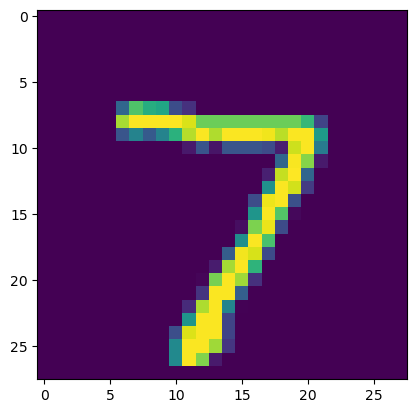

In [51]:
plt.imshow(x_test[0].reshape(28,28))
plt.show()

In [ ]:
plt.imshow(x_test[0].reshape(28,28))
plt.title(str(result[0]))
plt.show()